In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
cd /home/ildefonso/Documents/repos/vocalpy/scipy-proceedings-2023-vak

/home/ildefonso/Documents/repos/vocalpy/scipy-proceedings-2023-vak


In [3]:
RESULTS_ROOT = pathlib.Path('./results/BFSongRepo/all-birds/ED_TCN/results_230707_125523')

In [13]:
events_paths = sorted(RESULTS_ROOT.glob('train_dur*/replicate*/lightning_logs/version_0/events*'))
events_paths = [events_path for events_path in events_paths if 'train_dur_900' in str(events_path)]

In [14]:
import vak

In [28]:
data = []
for events_path in events_paths:
    df = vak.common.tensorboard.events2df(events_path)
    df['replicate'] = int(events_path.parents[-8].name.split('_')[-1])
    data.append(df)

data = pd.concat(data)

<Axes: xlabel='step', ylabel='val_loss_step'>

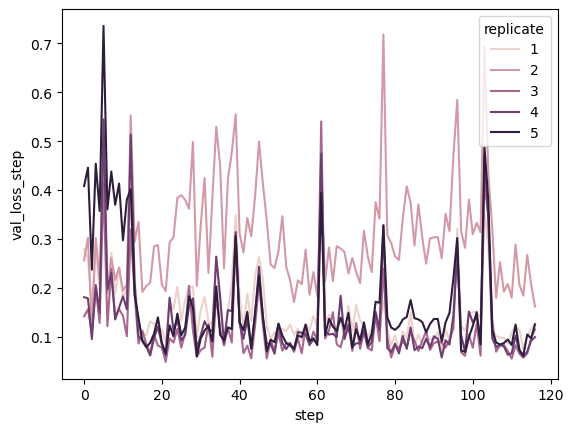

In [30]:
import seaborn as sns


sns.lineplot(
    data=data,
    x='step',
    y='val_loss_step',
    hue='replicate'
)